<a href="https://colab.research.google.com/github/wal-03/Multivariate-Statistic/blob/main/TURF%20Analysis%20Study%20Case/TURF_Analysis_Study_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Fadhilah Awal Rizqiansyah**

**NIM : 11220940000064**

**CLass : 6A**

# Optimizing Music Playlists with TURF Analysis: A Data-Driven Strategy to Maximize Listener Reach

How can we curate a genre-based playlist that maximizes user reach on a music streaming platform?

# The Challenge

In today’s digital landscape, users have highly diverse musical preferences. The challenge is building a playlist that not only fits a specific genre but also reaches as many unique listeners as possible. Optimizing playlist reach can improve user engagement, retention, and even monetization potential.

# Method



*   **Method Used :** TURF (Total Unduplicated Reach and Frequency) is a method commonly used in marketing analytics to determine the optimal combination of items (products, ads, or in this case, songs) that collectively reach the largest number of unique users.

*   **Objective :** To identify a combination of songs within each genre that reaches at least 80% of users.
*   **Why is This Method Suitable :** Since each user only likes a small portion of all songs, selecting the wrong combination can result in low reach. TURF helps find the least overlapping songs, maximizing total reach across different users.


*   **Assumption :**


      1.   User preferences for songs are binary (like = 1, dislike = 0).
      2.   Each user likes approximately 25% of the available songs.
      3.   This analysis focuses only on genre-based selection, ignoring other factors like tempo or mood.





Let's try with song data and its attributes that are generated randomly for us to do TURF Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate simulation data
n_users = 1000  # Number of users
n_songs = 50    # Number of songs
target_reach_pct = 0.80  # Target reach 80%

# Song titles
titles = [
    "Dancing in the Moonlight", "Sweet Escape", "Rhythm of the Night", "Golden Hour", "Echoes of Love",
    "Midnight Drive", "Sunset Dreams", "Electric Pulse", "Whispers in the Wind", "Neon Lights",
    "Chasing Stars", "Fading Memories", "Heartbeat", "Ocean Waves", "Skyline", "Fire and Ice", "Lost in Time",
    "Eternal Flame", "Shadow Dance", "Bright Future", "Silent Night", "Wild Hearts", "Urban Jungle",
    "Mystic Journey", "Golden Days", "Electric Dreams", "Soulful Vibe", "Timeless Love", "Echoes of Joy",
    "Stardust", "Moonlit Serenade", "Endless Road", "Velvet Sky", "Crystal Waters", "Night Owl",
    "Flicker of Hope", "Thunderstrike", "Polar Lights", "Warm Embrace", "Glittering Eyes", "Silver Lining",
    "Echoes of Dawn", "Wanderlust", "Shimmering Stars", "Blue Horizon", "Crimson Tide", "Frosty Echoes",
    "Golden Spark", "Lunar Dance", "Solar Flare"
]
songs = [f"{title} - Artist_{i+1}" for i, title in enumerate(titles)]

# Song attributes
genres = ['Pop', 'Rock', 'Jazz', 'Hip-Hop', 'Classical']
tempos = ['Slow', 'Medium', 'Fast']
moods = ['Happy', 'Sad', 'Energetic']
song_attributes = pd.DataFrame({
    'Song': songs,
    'Genre': np.random.choice(genres, n_songs),
    'Tempo': np.random.choice(tempos, n_songs),
    'Mood': np.random.choice(moods, n_songs)
})

# Generate user preferences (1 if liked, 0 if not)
user_preferences = np.random.choice([0, 1], size=(n_users, n_songs), p=[0.75, 0.25])
data_used = pd.DataFrame(user_preferences, columns=songs)

# Add user ID column
data_used['id'] = range(1, n_users + 1)

# Generate user attributes
user_attributes = pd.DataFrame({
    'id': range(1, n_users + 1),
    'Genre': np.random.choice(genres, n_users),
    'Tempo': np.random.choice(tempos, n_users),
    'Mood': np.random.choice(moods, n_users)
})

# Merge user attributes with song preferences
merged_df = pd.merge(user_attributes, data_used, on='id')

# Move 'id' column to the first position
cols = ['id', 'Genre', 'Tempo', 'Mood'] + songs
merged_df = merged_df[cols]

# Display sample of the generated DataFrame
print("Generated Song Data:")
merged_df

Generated Song Data:


,id,Genre,Tempo,Mood,Dancing in the Moonlight - Artist_1,Sweet Escape - Artist_2,Rhythm of the Night - Artist_3,Golden Hour - Artist_4,Echoes of Love - Artist_5,Midnight Drive - Artist_6,...,Silver Lining - Artist_41,Echoes of Dawn - Artist_42,Wanderlust - Artist_43,Shimmering Stars - Artist_44,Blue Horizon - Artist_45,Crimson Tide - Artist_46,Frosty Echoes - Artist_47,Golden Spark - Artist_48,Lunar Dance - Artist_49,Solar Flare - Artist_50
0,1,Classical,Slow,Energetic,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Classical,Medium,Energetic,0,0,0,1,0,1,...,1,1,0,1,1,1,1,0,0,0
2,3,Rock,Medium,Sad,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,Jazz,Medium,Happy,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,5,Jazz,Fast,Energetic,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Hip-Hop,Fast,Sad,1,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
996,997,Hip-Hop,Fast,Happy,1,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
997,998,Classical,Fast,Happy,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
998,999,Classical,Medium,Happy,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [3]:
# Display DataFrame info
print("\nDataFrame Info:\n")
merged_df.info()


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1000 non-null   int64 
 1   Genre                                1000 non-null   object
 2   Tempo                                1000 non-null   object
 3   Mood                                 1000 non-null   object
 4   Dancing in the Moonlight - Artist_1  1000 non-null   int64 
 5   Sweet Escape - Artist_2              1000 non-null   int64 
 6   Rhythm of the Night - Artist_3       1000 non-null   int64 
 7   Golden Hour - Artist_4               1000 non-null   int64 
 8   Echoes of Love - Artist_5            1000 non-null   int64 
 9   Midnight Drive - Artist_6            1000 non-null   int64 
 10  Sunset Dreams - Artist_7             1000 non-null   int64 
 11  Electric Pulse - Artist_8 

# TURF Analysis and Interpretation


=== TURF Analysis for Genre: Pop ===



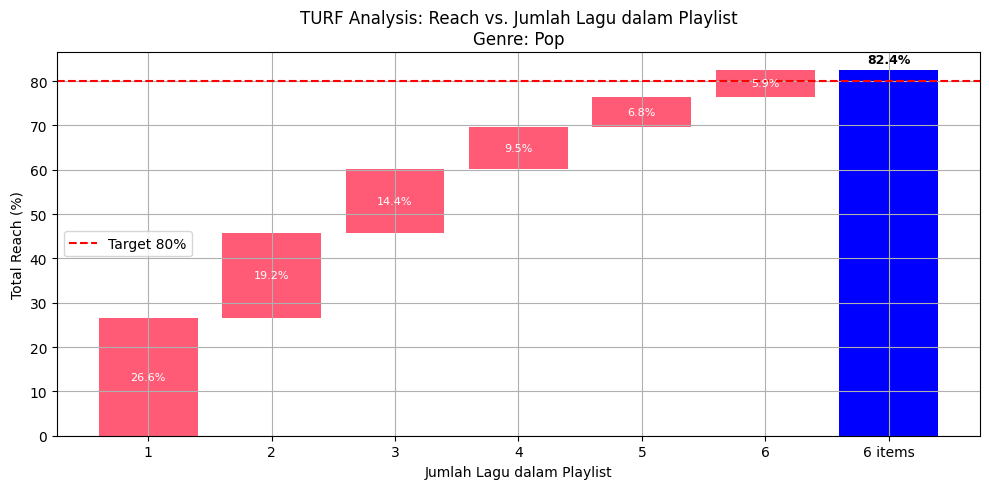


Reached 82.4% with 6 songs.
Selected songs: ['Warm Embrace - Artist_39', 'Crystal Waters - Artist_34', 'Shadow Dance - Artist_19', 'Echoes of Dawn - Artist_42', 'Golden Days - Artist_25', 'Crimson Tide - Artist_46']

Attributes of Selected Songs for Pop:
                          Song Genre   Tempo       Mood
18    Shadow Dance - Artist_19   Pop  Medium  Energetic
24     Golden Days - Artist_25   Pop  Medium        Sad
33  Crystal Waters - Artist_34   Pop  Medium  Energetic
38    Warm Embrace - Artist_39   Pop    Fast        Sad
41  Echoes of Dawn - Artist_42   Pop    Slow  Energetic
45    Crimson Tide - Artist_46   Pop    Fast        Sad

=== TURF Analysis for Genre: Rock ===



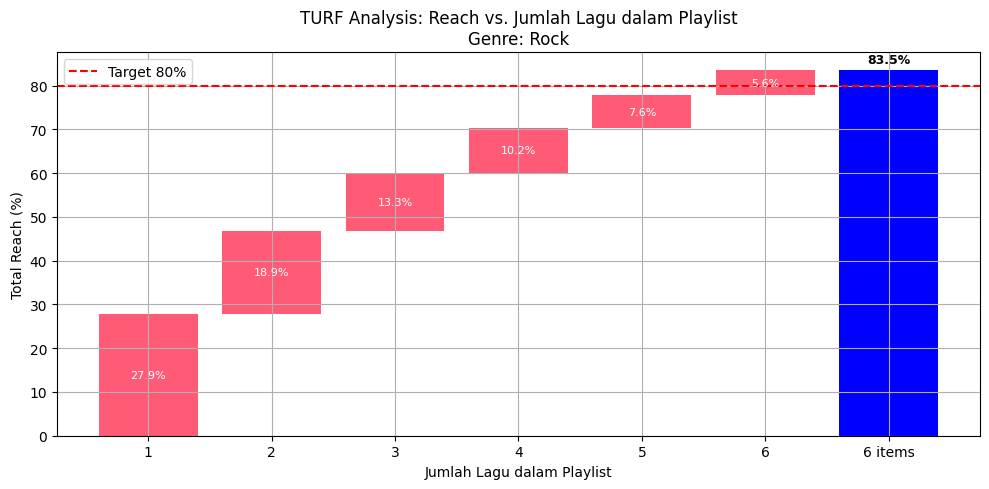


Reached 83.5% with 6 songs.
Selected songs: ['Timeless Love - Artist_28', 'Fire and Ice - Artist_16', 'Ocean Waves - Artist_14', 'Shimmering Stars - Artist_44', 'Frosty Echoes - Artist_47', 'Lunar Dance - Artist_49']

Attributes of Selected Songs for Rock:
                            Song Genre   Tempo       Mood
13       Ocean Waves - Artist_14  Rock  Medium  Energetic
15      Fire and Ice - Artist_16  Rock    Fast      Happy
27     Timeless Love - Artist_28  Rock  Medium      Happy
43  Shimmering Stars - Artist_44  Rock    Slow      Happy
46     Frosty Echoes - Artist_47  Rock    Fast      Happy
48       Lunar Dance - Artist_49  Rock    Slow  Energetic

=== TURF Analysis for Genre: Jazz ===



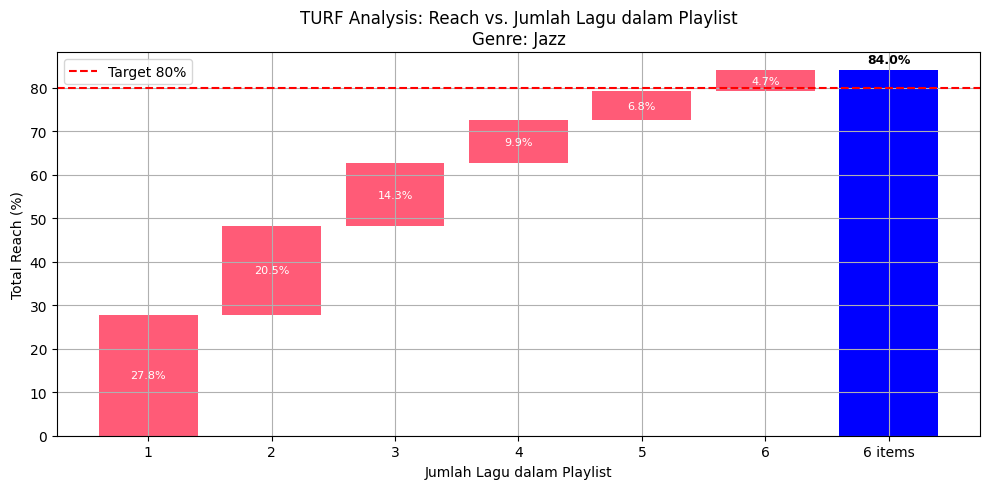


Reached 84.0% with 6 songs.
Selected songs: ['Night Owl - Artist_35', 'Electric Pulse - Artist_8', 'Whispers in the Wind - Artist_9', 'Sunset Dreams - Artist_7', 'Moonlit Serenade - Artist_31', 'Thunderstrike - Artist_37']

Attributes of Selected Songs for Jazz:
                               Song Genre   Tempo       Mood
6          Sunset Dreams - Artist_7  Jazz    Slow        Sad
7         Electric Pulse - Artist_8  Jazz  Medium      Happy
8   Whispers in the Wind - Artist_9  Jazz  Medium  Energetic
30     Moonlit Serenade - Artist_31  Jazz  Medium  Energetic
34            Night Owl - Artist_35  Jazz    Slow      Happy
36        Thunderstrike - Artist_37  Jazz    Slow  Energetic

=== TURF Analysis for Genre: Hip-Hop ===



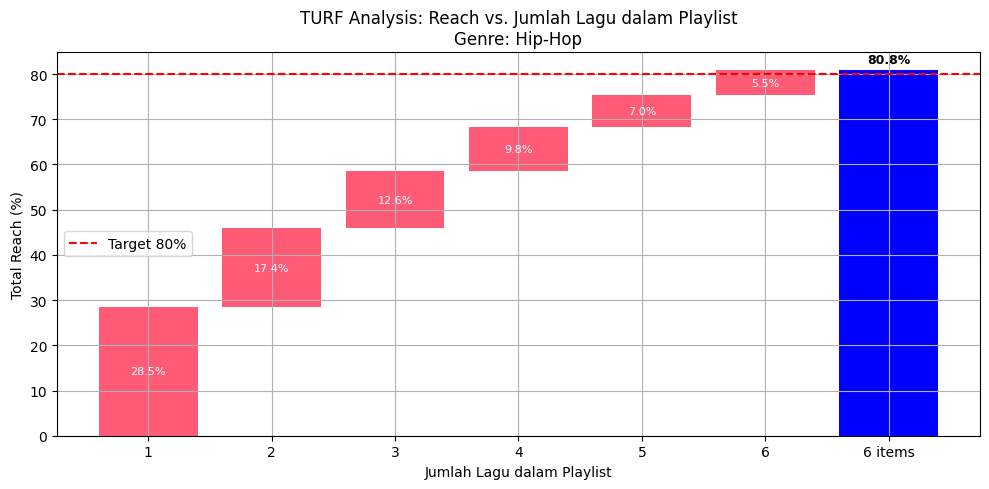


Reached 80.8% with 6 songs.
Selected songs: ['Endless Road - Artist_32', 'Solar Flare - Artist_50', 'Lost in Time - Artist_17', 'Silver Lining - Artist_41', 'Velvet Sky - Artist_33', 'Echoes of Joy - Artist_29']

Attributes of Selected Songs for Hip-Hop:
                         Song    Genre   Tempo       Mood
16   Lost in Time - Artist_17  Hip-Hop  Medium  Energetic
28  Echoes of Joy - Artist_29  Hip-Hop    Slow        Sad
31   Endless Road - Artist_32  Hip-Hop    Fast        Sad
32     Velvet Sky - Artist_33  Hip-Hop    Slow  Energetic
40  Silver Lining - Artist_41  Hip-Hop    Slow  Energetic
49    Solar Flare - Artist_50  Hip-Hop    Fast      Happy

=== TURF Analysis for Genre: Classical ===



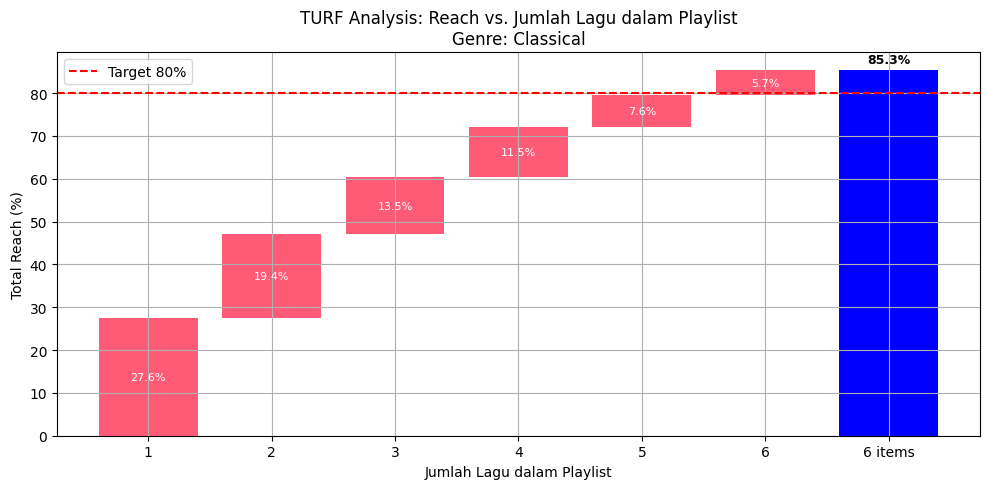


Reached 85.3% with 6 songs.
Selected songs: ['Sweet Escape - Artist_2', 'Polar Lights - Artist_38', 'Heartbeat - Artist_13', 'Eternal Flame - Artist_18', 'Golden Hour - Artist_4', 'Flicker of Hope - Artist_36']

Attributes of Selected Songs for Classical:
                           Song      Genre   Tempo       Mood
1       Sweet Escape - Artist_2  Classical    Fast      Happy
3        Golden Hour - Artist_4  Classical    Fast      Happy
12        Heartbeat - Artist_13  Classical  Medium  Energetic
17    Eternal Flame - Artist_18  Classical  Medium        Sad
35  Flicker of Hope - Artist_36  Classical    Slow  Energetic
37     Polar Lights - Artist_38  Classical    Slow        Sad

=== TURF Analysis for All Genres ===



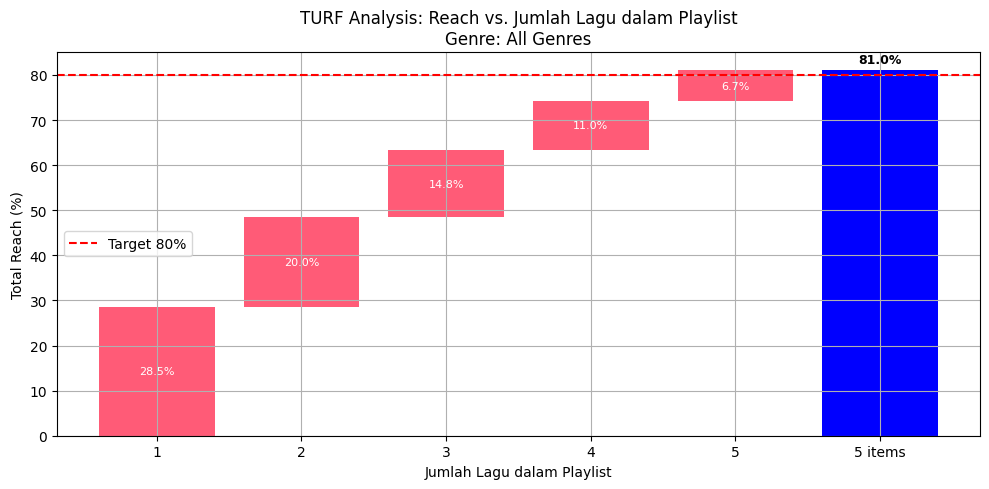


Reached 81.0% with 5 songs.
Selected songs: ['Endless Road - Artist_32', 'Timeless Love - Artist_28', 'Night Owl - Artist_35', 'Sweet Escape - Artist_2', 'Electric Pulse - Artist_8']

Attributes of Selected Songs for All Genres:
                         Song      Genre   Tempo   Mood
1     Sweet Escape - Artist_2  Classical    Fast  Happy
7   Electric Pulse - Artist_8       Jazz  Medium  Happy
27  Timeless Love - Artist_28       Rock  Medium  Happy
31   Endless Road - Artist_32    Hip-Hop    Fast    Sad
34      Night Owl - Artist_35       Jazz    Slow  Happy


In [4]:
# TURF Analysis per Genre and All Genres
genre_results = {}
# List of genres with Pop first
ordered_genres = ['Pop'] + [g for g in genres if g != 'Pop']

for genre in ordered_genres:
    print(f"\n=== TURF Analysis for Genre: {genre} ===\n")

    # Filter songs by genre
    genre_songs = song_attributes[song_attributes['Genre'] == genre]['Song'].tolist()
    if not genre_songs:
        print(f"No songs found for genre {genre}.")
        continue

    # Filter user preferences for songs in this genre
    genre_data = data_used[['id'] + genre_songs]

    # Calculate reach per song in this genre
    reach_per_item = genre_data.drop('id', axis=1).sum(axis=0).sort_values(ascending=False)

    selected_items = []
    current_reach = set()
    reach_progress = []

    # Perform TURF analysis
    for item in reach_per_item.index:
        new_reach = current_reach | set(genre_data.index[genre_data[item] == 1])
        selected_items.append(item)
        reach_progress.append(len(new_reach) / len(genre_data))

        if len(new_reach) / len(genre_data) >= target_reach_pct:
            break

        current_reach = new_reach

    # Store results
    genre_results[genre] = {
        'selected_items': selected_items,
        'reach_progress': reach_progress,
        'max_reach': max(reach_progress) if reach_progress else 0
    }

    # Matplotlib Visualization: Single plot with red bars and blue bar
    if genre in genre_results and genre_results[genre]['reach_progress']:
        reach_progress = genre_results[genre]['reach_progress']

        # Calculate incremental reaches
        incrementals = [reach_progress[0]] + [reach_progress[j] - reach_progress[j-1] for j in range(1, len(reach_progress))]

        # Find the index of the smallest red bar
        smallest_idx = np.argmin(incrementals)  # Index of the smallest incremental reach
        num_items = len(reach_progress)

        # Create a list of x positions and labels
        x_positions = list(range(len(incrementals)))  # Positions for red bars (0, 1, ..., num_items-1)
        x_labels = [str(i+1) for i in range(len(incrementals))]  # Labels for red bars ("1", "2", ..., "num_items")

        # Insert the blue bar position right after the smallest red bar
        blue_bar_position = smallest_idx + 1
        x_positions.insert(blue_bar_position, blue_bar_position)
        x_labels.insert(blue_bar_position, f"{num_items} items")

        # Plotting
        plt.figure(figsize=(10, 5))
        bottoms = 0
        for i, (pos, label, inc) in enumerate(zip(x_positions[:blue_bar_position], x_labels[:blue_bar_position], incrementals[:smallest_idx+1])):
            plt.bar(pos, inc * 100, bottom=bottoms, color="#ff5b77")
            plt.text(pos, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='center', fontsize=8, color='white')
            bottoms += inc * 100

        # Plot the blue bar at the specified position
        total_reach = reach_progress[-1]
        plt.bar(blue_bar_position, total_reach * 100, color="blue")
        plt.text(blue_bar_position, total_reach * 100 + 1, f"{total_reach*100:.1f}%",
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

        # Plot the remaining red bars after the blue bar
        bottoms = sum(inc * 100 for inc in incrementals[:smallest_idx+1])
        for i, (pos, label, inc) in enumerate(zip(x_positions[blue_bar_position+1:], x_labels[blue_bar_position+1:], incrementals[smallest_idx+1:])):
            plt.bar(pos, inc * 100, bottom=bottoms, color="#ff5b77")
            plt.text(pos, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='center', fontsize=8, color='white')
            bottoms += inc * 100

        # Set x-axis ticks and labels
        plt.xticks(range(len(x_positions)), x_labels, rotation=0)

        plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')
        plt.xlabel("Jumlah Lagu dalam Playlist")
        plt.ylabel("Total Reach (%)")
        plt.title(f"TURF Analysis: Reach vs. Jumlah Lagu dalam Playlist\nGenre: {genre}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Print results
    max_reach = genre_results[genre]['max_reach']
    if max_reach >= target_reach_pct:
        print(f"\nReached {max_reach*100:.1f}% with {len(selected_items)} songs.")
    else:
        print(f"Could not reach {target_reach_pct*100:.0f}%. Max reach: {max_reach*100:.1f}% with {len(selected_items)} songs.")
    print(f"Selected songs: {selected_items}")

    # Display attributes of selected songs
    selected_songs_df = song_attributes[song_attributes['Song'].isin(selected_items)]
    print(f"\nAttributes of Selected Songs for {genre}:")
    print(selected_songs_df)

# TURF Analysis for All Genres
print(f"\n=== TURF Analysis for All Genres ===\n")

# Use all songs for the analysis
all_songs = song_attributes['Song'].tolist()
all_data = data_used[['id'] + all_songs]

# Calculate reach per song across all genres
reach_per_item = all_data.drop('id', axis=1).sum(axis=0).sort_values(ascending=False)

selected_items = []
current_reach = set()
reach_progress = []

# Perform TURF analysis for all genres
for item in reach_per_item.index:
    new_reach = current_reach | set(all_data.index[all_data[item] == 1])
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(all_data))

    if len(new_reach) / len(all_data) >= target_reach_pct:
        break

    current_reach = new_reach

# Store results
genre_results['All Genres'] = {
    'selected_items': selected_items,
    'reach_progress': reach_progress,
    'max_reach': max(reach_progress) if reach_progress else 0
}

# Matplotlib Visualization: Single plot with red bars and blue bar for All Genres
if 'All Genres' in genre_results and genre_results['All Genres']['reach_progress']:
    reach_progress = genre_results['All Genres']['reach_progress']

    # Calculate incremental reaches
    incrementals = [reach_progress[0]] + [reach_progress[j] - reach_progress[j-1] for j in range(1, len(reach_progress))]

    # Find the index of the smallest red bar
    smallest_idx = np.argmin(incrementals)  # Index of the smallest incremental reach
    num_items = len(reach_progress)

    # Create a list of x positions and labels
    x_positions = list(range(len(incrementals)))  # Positions for red bars (0, 1, ..., num_items-1)
    x_labels = [str(i+1) for i in range(len(incrementals))]  # Labels for red bars ("1", "2", ..., "num_items")

    # Insert the blue bar position right after the smallest red bar
    blue_bar_position = smallest_idx + 1
    x_positions.insert(blue_bar_position, blue_bar_position)
    x_labels.insert(blue_bar_position, f"{num_items} items")

    # Plotting
    plt.figure(figsize=(10, 5))
    bottoms = 0
    for i, (pos, label, inc) in enumerate(zip(x_positions[:blue_bar_position], x_labels[:blue_bar_position], incrementals[:smallest_idx+1])):
        plt.bar(pos, inc * 100, bottom=bottoms, color="#ff5b77")
        plt.text(pos, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='center', fontsize=8, color='white')
        bottoms += inc * 100

    # Plot the blue bar at the specified position
    total_reach = reach_progress[-1]
    plt.bar(blue_bar_position, total_reach * 100, color="blue")
    plt.text(blue_bar_position, total_reach * 100 + 1, f"{total_reach*100:.1f}%",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Plot the remaining red bars after the blue bar
    bottoms = sum(inc * 100 for inc in incrementals[:smallest_idx+1])
    for i, (pos, label, inc) in enumerate(zip(x_positions[blue_bar_position+1:], x_labels[blue_bar_position+1:], incrementals[smallest_idx+1:])):
        plt.bar(pos, inc * 100, bottom=bottoms, color="#ff5b77")
        plt.text(pos, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='center', fontsize=8, color='white')
        bottoms += inc * 100

    # Set x-axis ticks and labels
    plt.xticks(range(len(x_positions)), x_labels, rotation=0)

    plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')
    plt.xlabel("Jumlah Lagu dalam Playlist")
    plt.ylabel("Total Reach (%)")
    plt.title(f"TURF Analysis: Reach vs. Jumlah Lagu dalam Playlist\nGenre: All Genres")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print results for All Genres
max_reach = genre_results['All Genres']['max_reach']
if max_reach >= target_reach_pct:
    print(f"\nReached {max_reach*100:.1f}% with {len(selected_items)} songs.")
else:
    print(f"Could not reach {target_reach_pct*100:.0f}%. Max reach: {max_reach*100:.1f}% with {len(selected_items)} songs.")
print(f"Selected songs: {selected_items}")

# Display attributes of selected songs for All Genres
selected_songs_df = song_attributes[song_attributes['Song'].isin(selected_items)]
print(f"\nAttributes of Selected Songs for All Genres:")
print(selected_songs_df)

## Interpretation

1. Pop Genre

  To exceed the minimal of 80% reach, pop genre needs 6 song to be added to the playlist, that is 'Shadow Dance - Artist_19', 'Golden Days - Artist_25', 'Crystal Waters - Artist_34', 'Warm Embrace - Artist_39', 'Echoes of Dawn - Artist_42', and 'Crimson Tide - Artist_46'

2. Rock Genre

  To exceed the minimal of 80% reach, rock genre needs 6 song to be added to the playlist, that is 'Ocean Waves - Artist_14', 'Fire and Ice - Artist_16', 'Timeless Love - Artist_28', 'Shimmering Stars - Artist_44', 'Frosty Echoes - Artist_47', and 'Lunar Dance - Artist_49'

3. Jazz Genre

  To exceed the minimal of 80% reach, jazz genre needs 6 song to be added to the playlist, that is 'Sunset Dreams - Artist_7', 'Electric Pulse - Artist_8', 'Whispers in the Wind - Artist_9', 'Moonlit Serenade - Artist_31', 'Night Owl - Artist_35', and 'Thunderstrike - Artist_37'

4. Hip-Hop Genre

  To exceed the minimal of 80% reach, hip-hop genre needs 6 song to be added to the playlist, that is 'Lost in Time - Artist_17', 'Echoes of Joy - Artist_29', 'Endless Road - Artist_32', 'Velvet Sky - Artist_33', 'Silver Lining - Artist_41', and 'Solar Flare - Artist_50'

5. Classic Genre

  To exceed the minimal of 80% reach, classic genre needs 6 song to be added to the playlist, that is 'Sweet Escape - Artist_2', 'Golden Hour - Artist_4', 'Heartbeat - Artist_13', 'Eternal Flame - Artist_18', 'Flicker of Hope - Artist_36', and 'Polar Lights - Artist_38'

6. All Genre

  To exceed the minimal of 80% reach, all genre needs 5 song to be added to the playlist, that is 'Sweet Escape - Artist_2', 'Electric Pulse - Artist_8', 'Timeless Love - Artist_28', 'Endless Road - Artist_32', and 'Night Owl - Artist_35'